In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [74]:
df_crypto = pd.read_csv('bnb-usd-max.csv')
df_crypto

,snapped_at,price,market_cap,total_volume
0,2017-09-16 00:00:00 UTC,0.107251,1.072506e+07,1.051223e+00
1,2017-09-17 00:00:00 UTC,0.154041,1.540413e+07,1.467859e+01
2,2017-09-18 00:00:00 UTC,0.173491,1.734912e+07,6.001767e+00
3,2017-09-19 00:00:00 UTC,0.168334,1.683342e+07,3.878927e+00
4,2017-09-20 00:00:00 UTC,0.166628,1.666279e+07,4.068762e+01
...,...,...,...,...
1693,2022-05-08 00:00:00 UTC,366.256222,6.169440e+10,1.484663e+09
1694,2022-05-09 00:00:00 UTC,355.665582,5.977046e+10,1.768056e+09
1695,2022-05-10 00:00:00 UTC,301.283756,5.085914e+10,3.164347e+09
1696,2022-05-11 00:00:00 UTC,318.958394,5.362872e+10,4.423140e+09


In [76]:
df_crypto['snapped_at'] = pd.to_datetime(df_crypto['snapped_at'].apply(lambda s: s[:-3]))
df_price = df_crypto

In [4]:
df_crypto['snapped_at'] = pd.DatetimeIndex(df_crypto['snapped_at']).strftime('%Y-%m')
df_crypto

,snapped_at,price,market_cap,total_volume
0,2017-09,0.107251,1.072506e+07,1.051223e+00
1,2017-09,0.154041,1.540413e+07,1.467859e+01
2,2017-09,0.173491,1.734912e+07,6.001767e+00
3,2017-09,0.168334,1.683342e+07,3.878927e+00
4,2017-09,0.166628,1.666279e+07,4.068762e+01
...,...,...,...,...
1693,2022-05,366.256222,6.169440e+10,1.484663e+09
1694,2022-05,355.665582,5.977046e+10,1.768056e+09
1695,2022-05,301.283756,5.085914e+10,3.164347e+09
1696,2022-05,318.958394,5.362872e+10,4.423140e+09


In [5]:
group = df_crypto.groupby('snapped_at')['total_volume'].mean().to_frame()
group

,total_volume
snapped_at,
2017-09,5.490733e+01
2017-10,1.977982e+05
2017-11,6.053474e+06
2017-12,3.547317e+07
2018-01,1.664766e+08
2018-02,4.928563e+07
2018-03,8.035946e+07
2018-04,8.838393e+07
2018-05,5.681810e+07


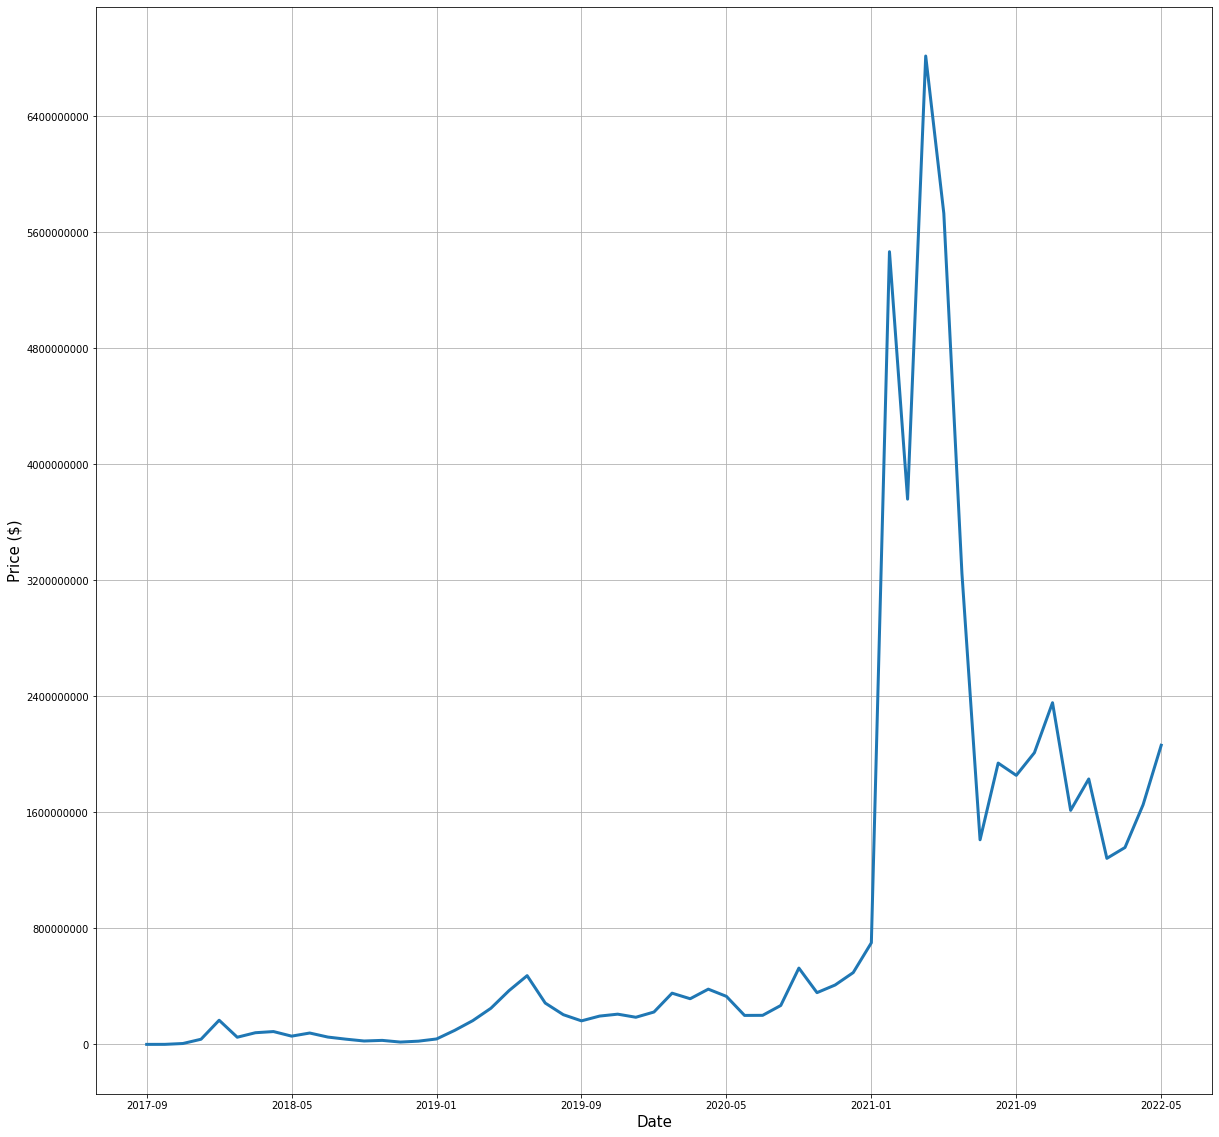

In [6]:
fig,ax = plt.subplots(figsize=(20,20))
ax.plot(group.index, group['total_volume'], linewidth=3)
ax.set_ylabel('Price ($)', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.ticklabel_format(style = 'plain', axis='y')
plt.grid()
plt.show()

# Prediction to 2022 Market-Volumen

In [53]:
group_2022 = group.iloc[-5:group.shape[0],:]

In [69]:
date_pred = np.array(['2022-01','2022-02','2022-03','2022-04','2022-05','2022-06', '2022-07', '2022-08', '2022-09'])

In [70]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(pd.DatetimeIndex(group_2022.index).month.to_numpy().reshape(-1, 1), group_2022.total_volume)
pred = reg.predict(pd.DatetimeIndex(date_pred).month.to_numpy().reshape(-1, 1))

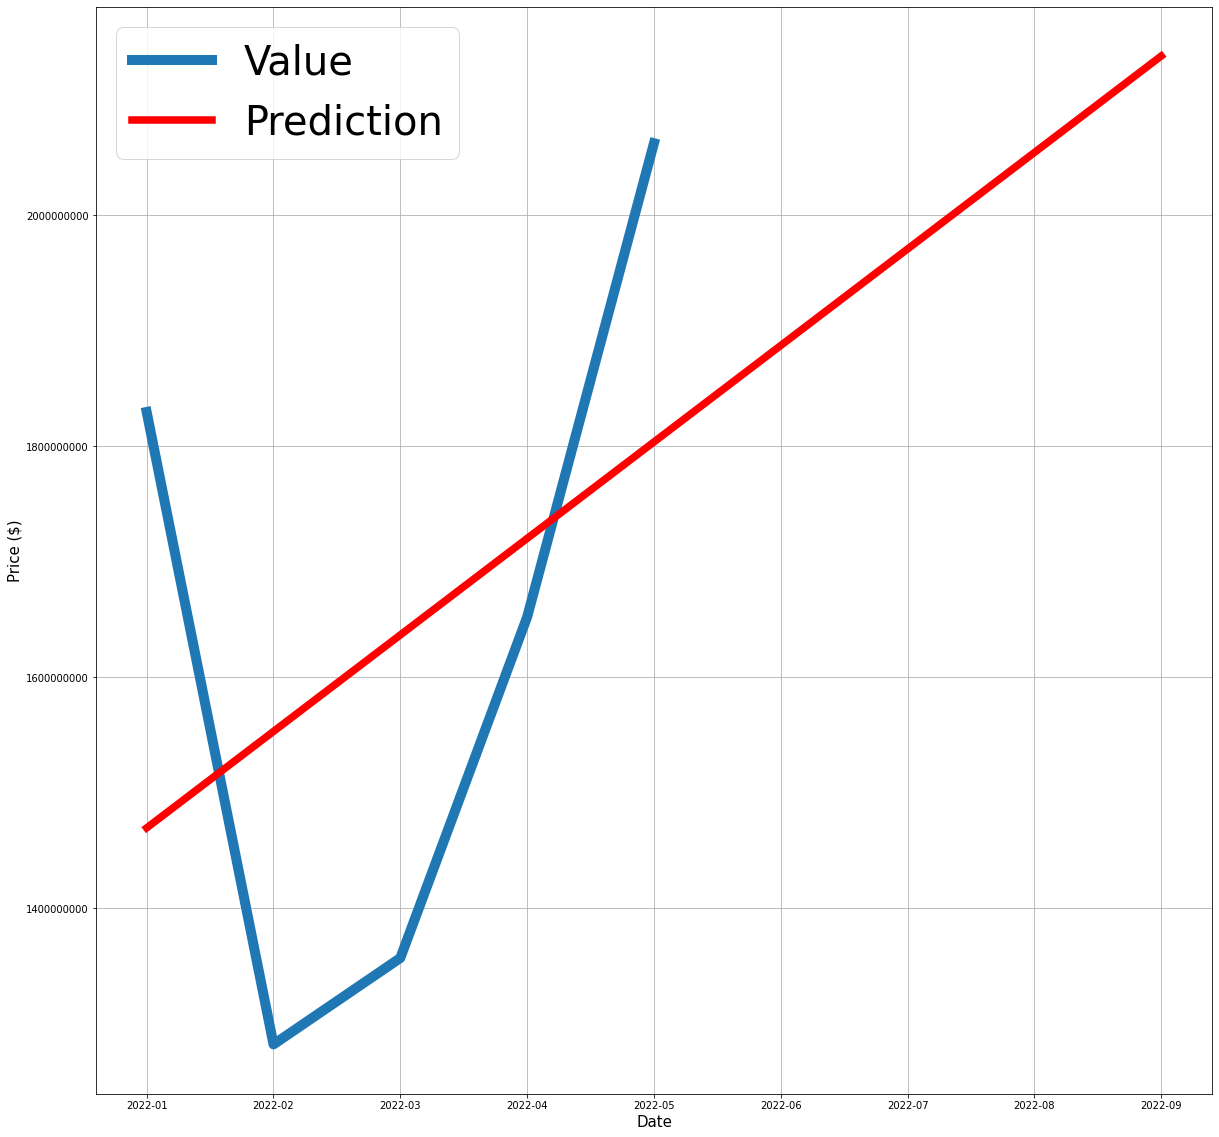

In [71]:
fig,ax = plt.subplots(figsize=(20,20))
ax.plot(group_2022.index, group_2022['total_volume'], linewidth=10, label='Value')
ax.plot(date_pred,pred, color='red', label='Prediction', linewidth=7.5)
ax.set_ylabel('Price ($)', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
plt.ticklabel_format(style = 'plain', axis='y')
plt.legend(loc='upper left', fontsize=40)
plt.grid()
plt.show()

# Price fluctuations

In [78]:
df_price

,snapped_at,price,market_cap,total_volume
0,2017-09,0.107251,1.072506e+07,1.051223e+00
1,2017-09,0.154041,1.540413e+07,1.467859e+01
2,2017-09,0.173491,1.734912e+07,6.001767e+00
3,2017-09,0.168334,1.683342e+07,3.878927e+00
4,2017-09,0.166628,1.666279e+07,4.068762e+01
...,...,...,...,...
1693,2022-05,366.256222,6.169440e+10,1.484663e+09
1694,2022-05,355.665582,5.977046e+10,1.768056e+09
1695,2022-05,301.283756,5.085914e+10,3.164347e+09
1696,2022-05,318.958394,5.362872e+10,4.423140e+09


In [82]:
price_group = df_price.groupby('snapped_at')['price'].mean().to_frame()

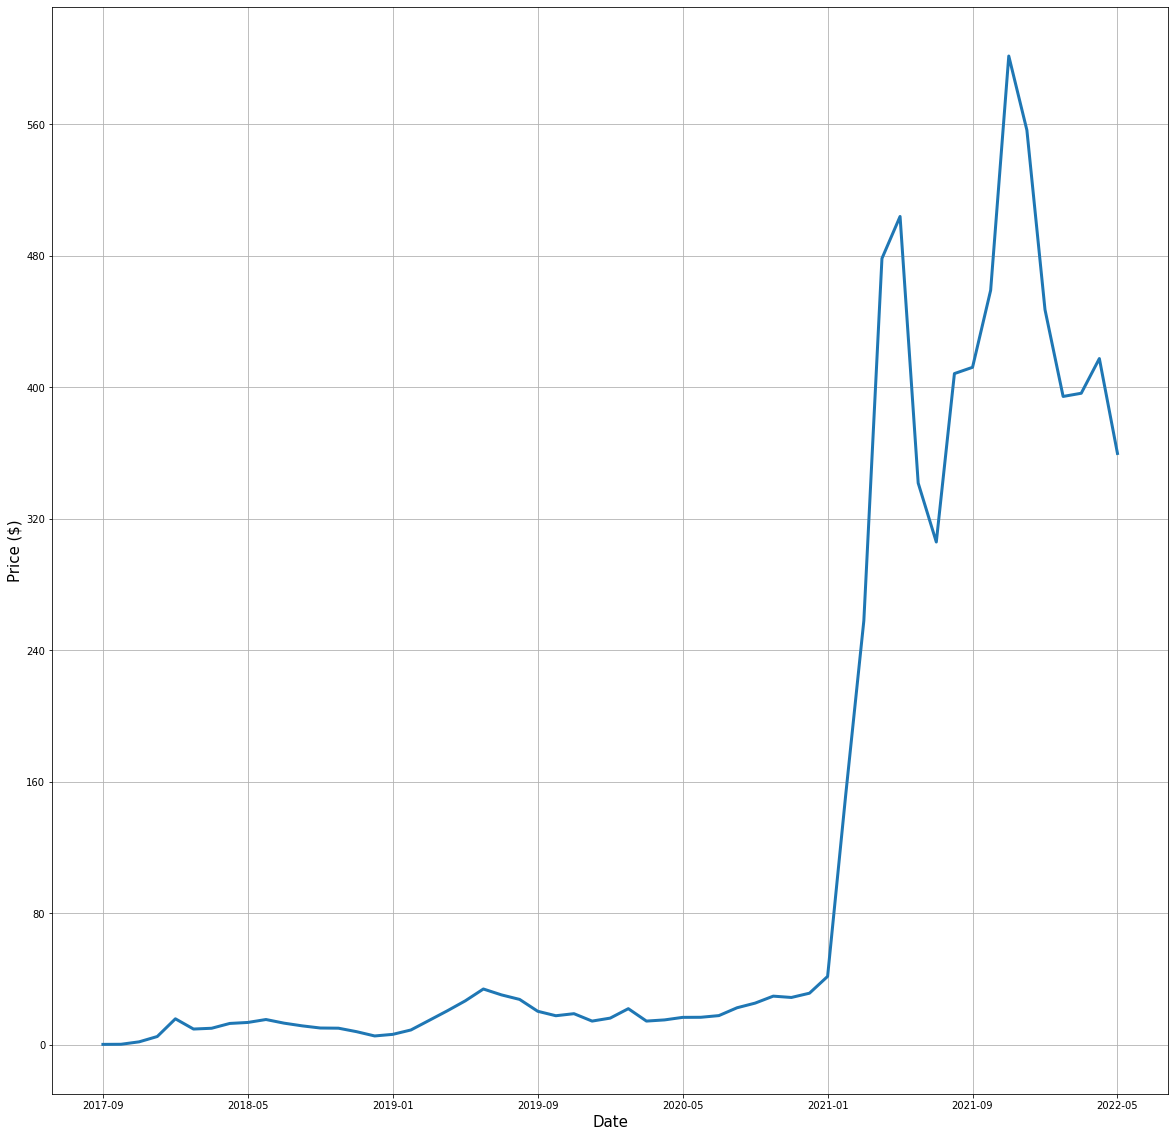

In [83]:
fig,ax = plt.subplots(figsize=(20,20))
ax.plot(price_group.index, price_group['price'], linewidth=3)
ax.set_ylabel('Price ($)', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.ticklabel_format(style = 'plain', axis='y')
plt.grid()
plt.show()

# Predict BNB price

In [84]:
price_group_2022 = price_group.iloc[-5:group.shape[0],:]

In [85]:
date_pred = np.array(['2022-01','2022-02','2022-03','2022-04','2022-05','2022-06', '2022-07', '2022-08', '2022-09'])

In [86]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(pd.DatetimeIndex(price_group_2022.index).month.to_numpy().reshape(-1, 1), price_group_2022.price)
pred = reg.predict(pd.DatetimeIndex(date_pred).month.to_numpy().reshape(-1, 1))

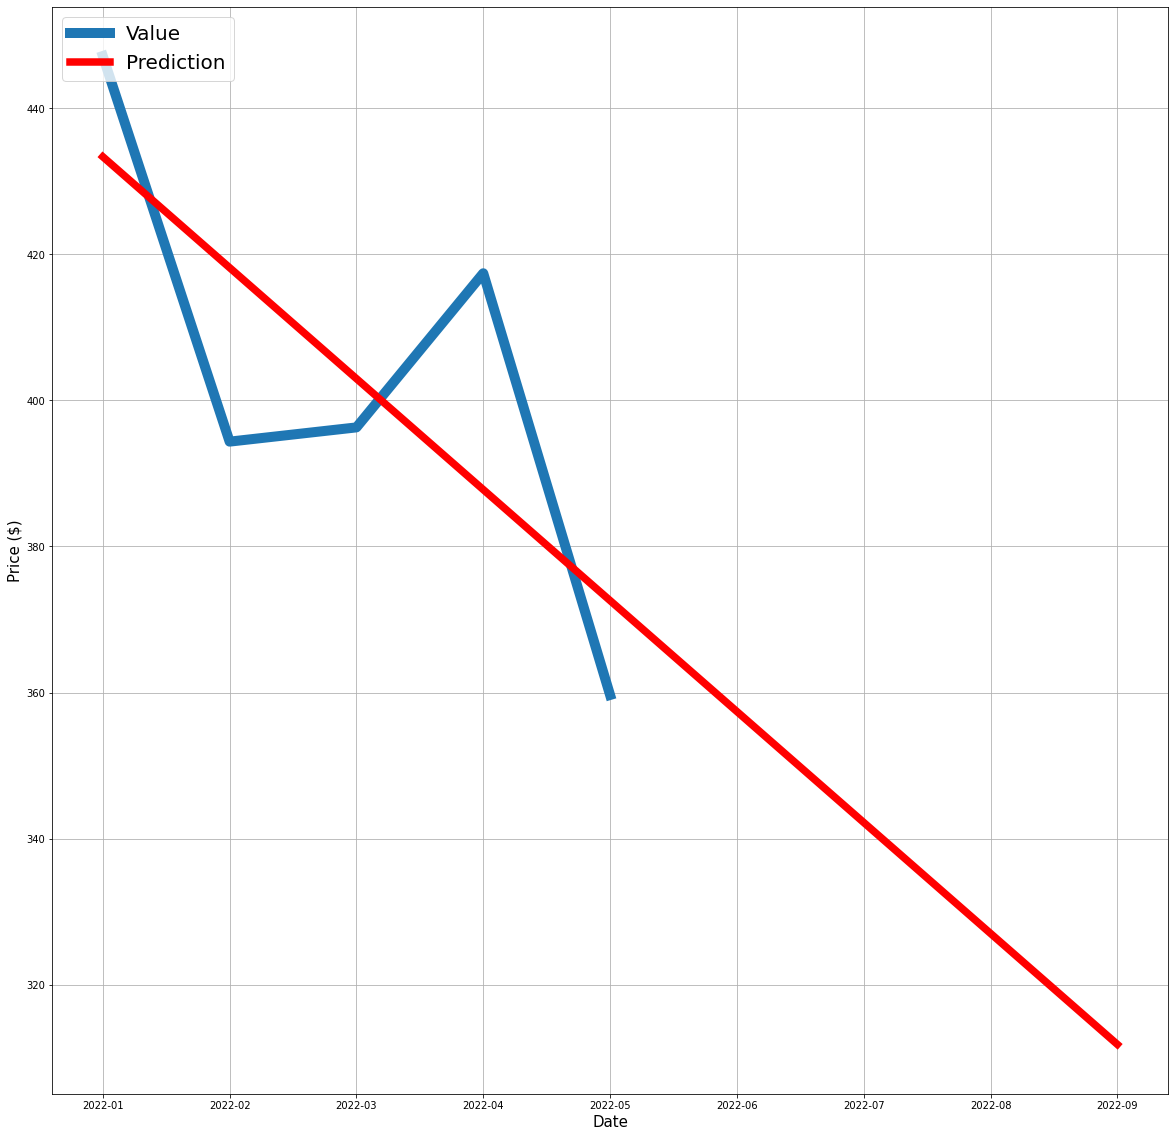

In [88]:
fig,ax = plt.subplots(figsize=(20,20))
ax.plot(price_group_2022.index, price_group_2022.price, linewidth=10, label='Value')
ax.plot(date_pred,pred, color='red', label='Prediction', linewidth=7.5)
ax.set_ylabel('Price ($)', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
plt.ticklabel_format(style = 'plain', axis='y')
plt.legend(loc='upper left', fontsize=20)
plt.grid()
plt.show()